# Algoritmos del camino más corto

Realice lo siguiente:

  * Programe el algoritmo de dijkstra para determinar el camino más corto de un vértice de inicio a todos los demás.
  * Mediante networkx muestre el grafo original y el camino mas corto resultante.

# Hacemos un grafo manualmente

{('A', 'B'): Text(0.2844509761417946, 0.27519860374692, '6'),
 ('A', 'C'): Text(0.2794038176602259, -0.1739482938510238, '2'),
 ('A', 'E'): Text(0.6185931416136736, -0.3551051849763188, '7'),
 ('B', 'C'): Text(-0.11859314161367379, 0.06320882650053025, '4'),
 ('B', 'D'): Text(-0.5567729915660525, 0.5480742205250252, '5'),
 ('C', 'D'): Text(-0.5618201500476212, 0.09892732292708137, '2'),
 ('C', 'E'): Text(0.21554902385820518, -0.5670949622227086, '9')}

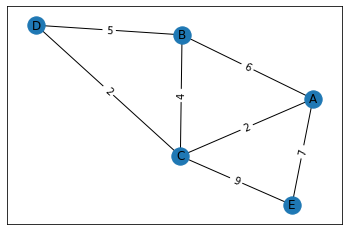

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
G.add_edge('A','B', weight=6)
G.add_edge('A','C', weight=2)
G.add_edge('A','E', weight=7)
G.add_edge('B','C', weight=4)
G.add_edge('B','D', weight=5)
G.add_edge('C','A', weight=2)
G.add_edge('C','D', weight=2)
G.add_edge('E','C', weight=9)
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

Realice lo siguiente:

  * Programe el algoritmo de Bellman-End-Ford para determinar el camino más corto de un vértice de inicio a todos los demás.
  * Mediante networkx muestre el grafo original y el camino mas corto resultante.

# Hacemos grafo manualmente

{('A', 'B'): Text(0.2623395971902667, 0.2786780055255636, '6'),
 ('A', 'C'): Text(0.2746810722039435, -0.1503886246069106, '2'),
 ('A', 'E'): Text(0.6174004000446098, -0.30892676412901693, '7'),
 ('B', 'C'): Text(-0.11740040004460985, 0.05459927461156083, '4'),
 ('B', 'D'): Text(-0.5648709375291433, 0.49616044188947384, '5'),
 ('C', 'D'): Text(-0.5525294625154665, 0.06709381175699963, '2'),
 ('C', 'E'): Text(0.23766040280973322, -0.5330054950430196, '9')}

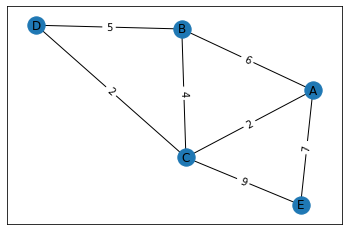

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
G.add_edge('A','B', weight=6)
G.add_edge('A','C', weight=2)
G.add_edge('A','E', weight=7)
G.add_edge('B','C', weight=4)
G.add_edge('B','D', weight=5)
G.add_edge('C','A', weight=2)
G.add_edge('C','D', weight=2)
G.add_edge('E','C', weight=9)
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

Realice lo siguiente:

  * Programe el algoritmo de Warshal-Floyd para determinar el camino más corto de un vértice de inicio a todos los demás.
  * Mediante networkx muestre el grafo original y el camino mas corto resultante.

# Creamos un grafo manualmente

{('A', 'B'): Text(-0.2960928113706127, 0.19370314631654606, '6'),
 ('A', 'C'): Text(0.09816037610170965, 0.28039340260122053, '2'),
 ('A', 'E'): Text(0.19052979486264982, 0.6155321216923182, '7'),
 ('B', 'C'): Text(-0.03325773632317866, -0.11553212169231895, '4'),
 ('B', 'D'): Text(-0.3710275204372217, -0.6011111889884967, '5'),
 ('C', 'D'): Text(0.023225667035100678, -0.5144209327038223, '2'),
 ('C', 'E'): Text(0.45336486991008385, 0.3062968536834533, '9')}

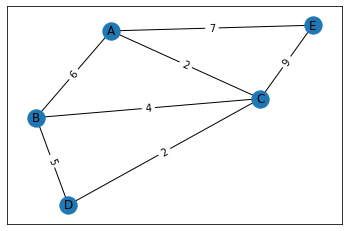

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def Dis(MetWar):
    n = len(MetWar)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                '''data.iloc[<filas>, <columnas>]'''
                MetWar.iloc[i, j] = min(MetWar.iloc[i, j], MetWar.iloc[i, k] + MetWar.iloc[k, j])
    return MetWar                   
def Rec(MetWar, vertices):
    n = len(MetWar)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                '''data.iloc[<filas>, <columnas>]'''
                if  MetWar.iloc[i,j] > MetWar.iloc[i,k] + MetWar.iloc[k,j]:
                    MetWar.iloc[i,j] = MetWar.iloc[i,k] +MetWar.iloc[k,j]
                    vertices.iloc[i,j] = MetWar.columns[k]
    return vertices

G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
G.add_edge('A','B', weight=6)
G.add_edge('A','C', weight=2)
G.add_edge('A','E', weight=7)
G.add_edge('B','C', weight=4)
G.add_edge('B','D', weight=5)
G.add_edge('C','A', weight=2)
G.add_edge('C','D', weight=2)
G.add_edge('E','C', weight=9)
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,)

# Distancia

In [34]:
Grafo = nx.to_pandas_adjacency(G, nonedge=float('inf'))
for i in range(len(Grafo)):
    Grafo.iloc[i, i] = 0
distancia = Dis(Grafo)
print("Distancia del grafo: \n")
print(distancia, "\n")

Distancia del grafo: 

     A     B    C     D     E
A  0.0   6.0  2.0   4.0   7.0
B  6.0   0.0  4.0   5.0  13.0
C  2.0   4.0  0.0   2.0   9.0
D  4.0   5.0  2.0   0.0  11.0
E  7.0  13.0  9.0  11.0   0.0 



# Recorrido

In [35]:
MetWarR = nx.to_pandas_adjacency(G, nonedge=float('inf'))
for i in range(len(MetWarR)):
    MetWarR.iloc[i, i] = 0
    
df1 = df = pd.DataFrame(columns=['0','1','2','3','4'], index=['0','1','2','3','4'])
df1.loc['0'] = pd.Series({'0':'A', '1':'B', '2':'C', '3':'E','4':'D'})
df1.loc['1'] = pd.Series({'0':'A', '1':'B', '2':'C', '3':'E','4':'D'})
df1.loc['2'] = pd.Series({'0':'A', '1':'B', '2':'C', '3':'E','4':'D'})
df1.loc['3'] = pd.Series({'0':'A', '1':'B', '2':'C', '3':'E','4':'D'})
df1.loc['4'] = pd.Series({'0':'A', '1':'B', '2':'C', '3':'E','4':'D'})

#print(df1, "\n")
recorrido = Rec(MetWarR,df1)
print("Recorrido del grafo: \n",recorrido)

Recorrido del grafo: 
    0  1  2  3  4
0  A  B  C  C  D
1  A  B  C  E  A
2  A  B  C  E  D
3  C  B  C  E  C
4  A  A  C  C  D
